# Iris Data Set analysis in Python<br>

Today we will have a look at the Iris Dataset.<br>
Although this is a small data set of only 150 records and 4 columns it is a very popular DataSet for beginning Data Science.<br>
Let's have a preliminary look at the DataSet plotting the mean and variance of the DataSet.<br> 


Lets load the necessary python packages.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline  

In [2]:
iris = load_iris()
##iris.keys()


df= pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                 columns= iris['feature_names'] + ['target'])


df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


Thus we see that there are a total of 4 columns<br>
<b>1.)</b> Petal length <br>
<b>2.)</b> Petal width  <br> 
<b>3.)</b> Sepal length  
<b>4.)</b> Sepal width  

In [3]:
 len(df.index) 

150

Thus we see there are a total of 150 records.<br>
Let's see the different species.

In [4]:
pd.unique(df['species'])

[setosa, versicolor, virginica]
Categories (3, object): [setosa, versicolor, virginica]

In [5]:
avg_df=df.groupby('species', as_index=True)['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'].mean()
avg_df['species name'] = avg_df.index
avg_df_melt=pd.melt(avg_df, id_vars=['species name'], value_vars=['petal length (cm)','petal width (cm)','sepal length (cm)','sepal width (cm)'])
avg_df_melt

,species name,variable,value
0,setosa,petal length (cm),1.464
1,versicolor,petal length (cm),4.260
2,virginica,petal length (cm),5.552
3,setosa,petal width (cm),0.244
4,versicolor,petal width (cm),1.326
5,virginica,petal width (cm),2.026
6,setosa,sepal length (cm),5.006
7,versicolor,sepal length (cm),5.936
8,virginica,sepal length (cm),6.588
9,setosa,sepal width (cm),3.418


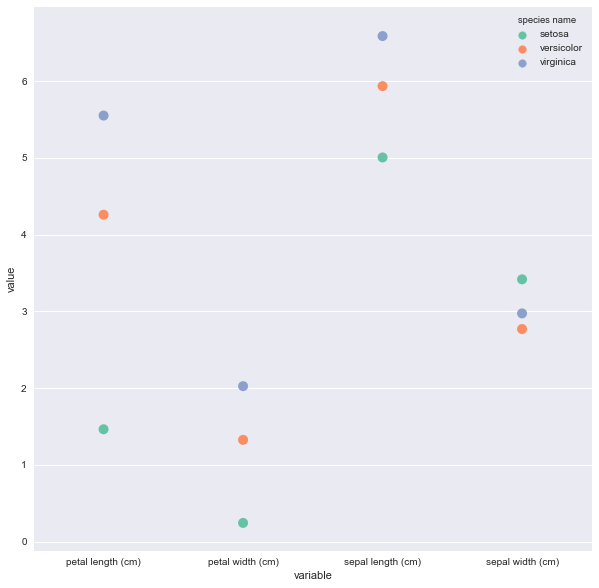

In [6]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,10))
sns.stripplot(x='variable',y='value',data=avg_df_melt,hue='species name',palette="Set2",s=10)

The above graph gives a visual representation of the average values of the attributes.<br>
The size of sentosa is smallest while virginca is the largest.<br>

In [7]:
sd_df=df.groupby('species', as_index=True)['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'].std()
sd_df['species name'] = sd_df.index
sd_df_melt=pd.melt(sd_df, id_vars=['species name'], value_vars=['petal length (cm)','petal width (cm)','sepal length (cm)','sepal width (cm)'])
sd_df_melt

,species name,variable,value
0,setosa,petal length (cm),0.173511
1,versicolor,petal length (cm),0.469911
2,virginica,petal length (cm),0.551895
3,setosa,petal width (cm),0.107210
4,versicolor,petal width (cm),0.197753
5,virginica,petal width (cm),0.274650
6,setosa,sepal length (cm),0.352490
7,versicolor,sepal length (cm),0.516171
8,virginica,sepal length (cm),0.635880
9,setosa,sepal width (cm),0.381024


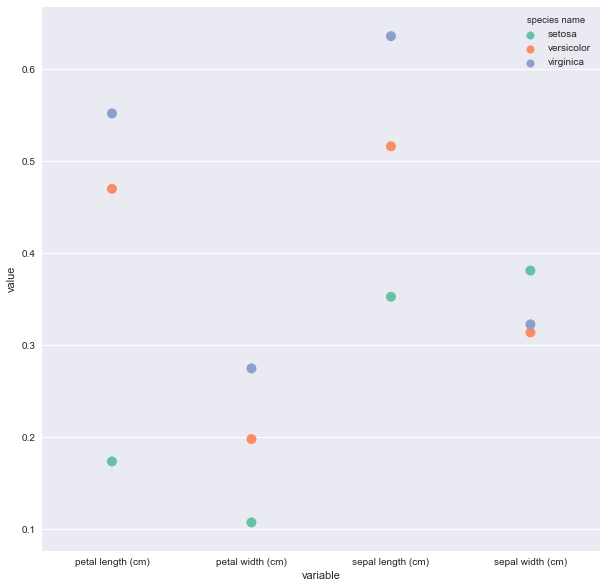

In [8]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,10))
sns.stripplot(x='variable',y='value',data=sd_df_melt,hue='species name',palette="Set2",s=10)

The above graph displays the Standard deviation

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [10]:
df_melt=pd.melt(df, id_vars=['species'], value_vars=['petal length (cm)','petal width (cm)','sepal length (cm)','sepal width (cm)'])
df_melt.head()

,species,variable,value
0,setosa,petal length (cm),1.4
1,setosa,petal length (cm),1.4
2,setosa,petal length (cm),1.3
3,setosa,petal length (cm),1.5
4,setosa,petal length (cm),1.4


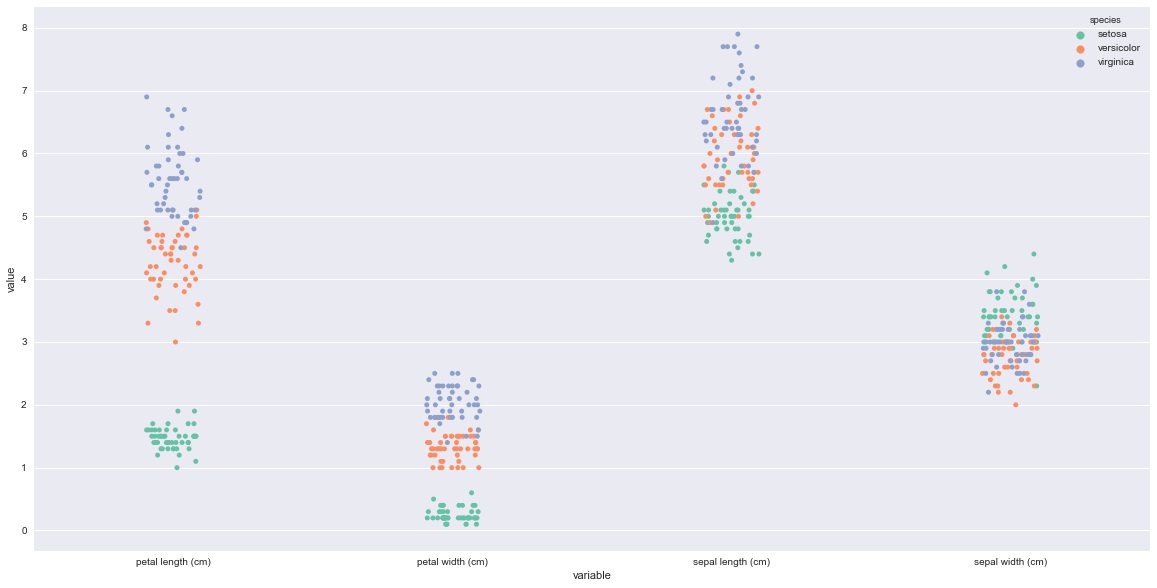

In [11]:
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))
sns.stripplot(x='variable',y='value',data=df_melt,hue='species',palette="Set2",jitter=True)

The smaller size of sentosa and large size of virginica is also clearly noticeable in the above graph with sentosa occupying the lower while virginica occupying  upper position in the graph.<br>
The below graph shows the boxplot.

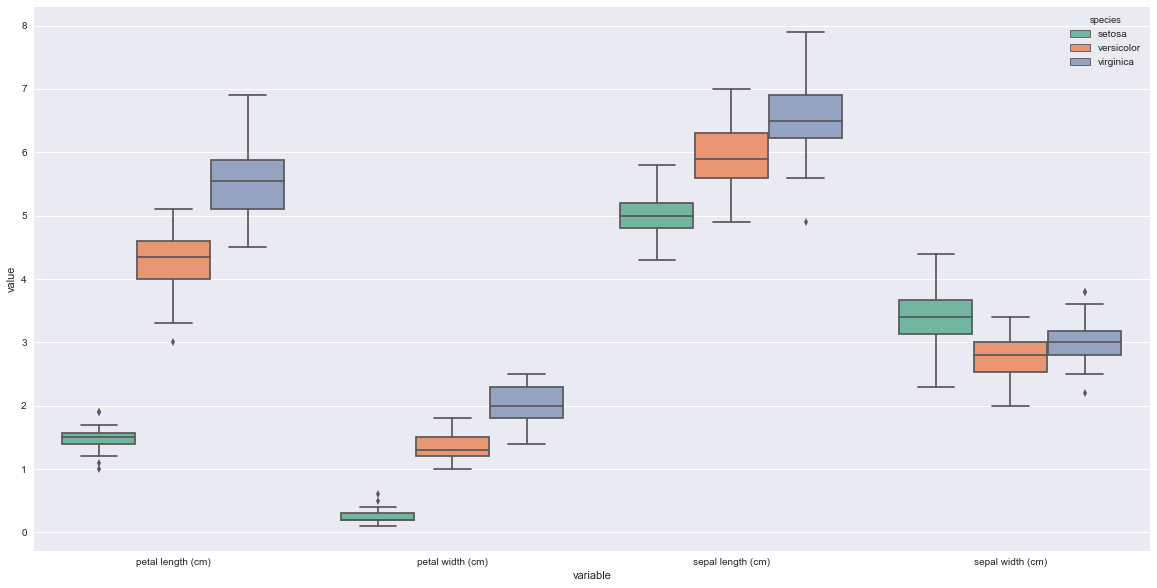

In [12]:
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))
sns.boxplot(x='variable',y='value',data=df_melt,hue='species',palette="Set2")